In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

The $\chi^2$ distribution is given by $$p(\chi^2, \nu) = \frac{(\chi^2)^{\frac{\nu}{2}-1}e^{-\frac{\chi^2}{2}}}{2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})}$$ for $\nu$ = number of degrees of freedom.

In [23]:
x = np.linspace(0, 20, 200)   # 201 bins from 0 to 20

In [24]:
y1 = stats.chi2.pdf(x, 1)   # 1 degree of freedom
y2 = stats.chi2.pdf(x, 2)   # 2 dof
y3 = stats.chi2.pdf(x, 3)   # 3
y4 = stats.chi2.pdf(x, 4)
y6 = stats.chi2.pdf(x, 6)
y9 = stats.chi2.pdf(x, 9)   # 9

<function matplotlib.pyplot.show(close=None, block=None)>

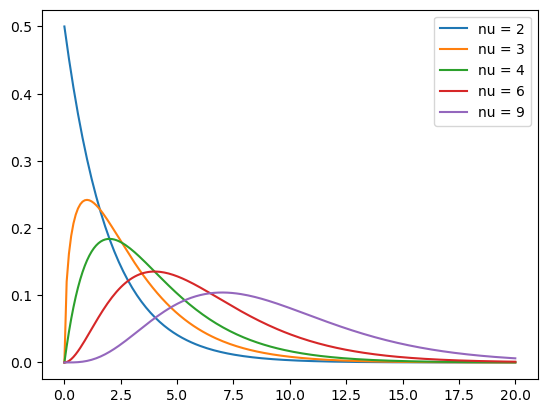

In [25]:
#plt.plot(x, y1, label='nu = 1')
plt.plot(x, y2, label='nu = 2')
plt.plot(x, y3, label='nu = 3')
plt.plot(x, y4, label='nu = 4')
plt.plot(x, y6, label='nu = 6')
plt.plot(x, y9, label='nu = 9')
plt.legend()
plt.show

What do these distributions represent?  If you drew $\nu$ random numbers {$x_i$} from a gaussian distribution with mean $\mu$ and variance $\sigma^2$, then the following sum: $$\sum_{i=1}^\nu \left( \frac{x_i-\mu}{\sigma} \right )^2$$ follows the $\chi^2$ distribution with $\nu$ degrees of freedom.

Here is a demonstration of **Theorem 1** in Gregory.

Let $\{X_i\} = X_1, X_2, ..., X_n$ be an indepent and identically distributed (IID) sample from a normal distribution $\mathcal{N}(\mu, \sigma)$.  Let $$Y = \sum_{i=1}^n \left ( \frac{X_i-\mu}{\sigma} \right )^2 = \sum_{i=1}^n Z_i^2,$$ where $Z_i$ are standard random variables.  Then $Y$ has a chi-squared ($\chi^2_n$) distribution with $n$ degrees of freedom.

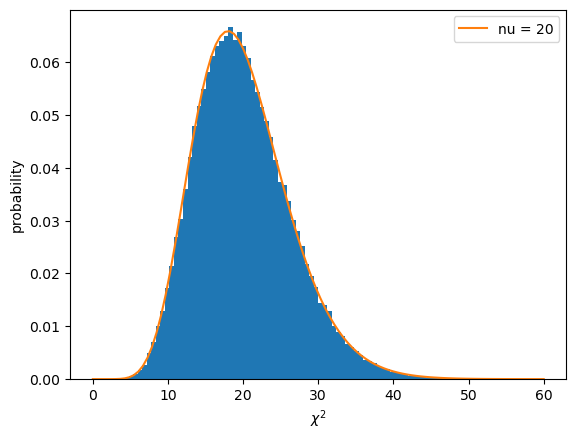

In [47]:
nu  = 20    # degrees of freedom
mu  = 5.0
sig = 2.0

xmax = nu*3

nsims = 100000
chi2vals = np.zeros(nsims)
for i in range(nsims):
    x = np.random.normal(loc=mu, scale=sig, size=nu)
    chi2vals[i] = np.sum(((x-mu)/sig)**2)
    
a,b,c = plt.hist(chi2vals, range=[0, xmax], bins=100, density=True)

xgrid = np.linspace(0, xmax, 100)

chi2pdf = stats.chi2.pdf(xgrid, nu)
plt.plot(xgrid, chi2pdf, label='nu = %d' %nu)
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.legend()

The following is another example.  We saw earlier from the Central Limit Theorem that the sample mean, $$\bar{X} = \frac{1}{n} \sum_i X_i$$ of $\{X_i\}$ drawn from an arbitrary probability distribution function with mean $\mu$ and variance $\sigma^2$ approaches a gaussian distribution with mean $\mu$ and variance $\sigma^2/n$ as $n \rightarrow \infty$.  Therefore, the quantity $$Y = \left(\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\right)^2$$ follows a chi-squared distribution with one degree of freedom $\chi^2_1$.

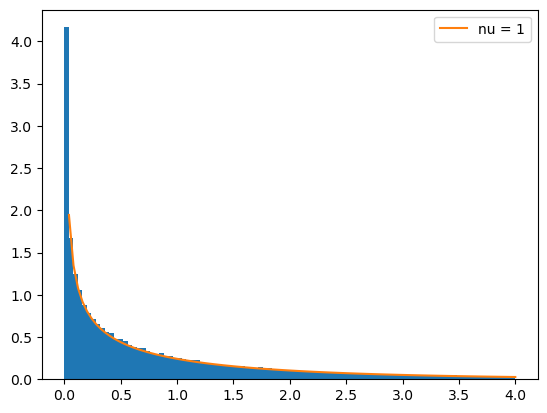

In [43]:
nu  = 20    # degrees of freedom
mu  = 5.0
sig = 2.0

xmax = nu/5

nsims = 100000
chi2vals = np.zeros(nsims)
for i in range(nsims):
    x = np.random.normal(loc=mu, scale=sig, size=nu)
    # this time we want to compute (mean(x)-mu)*sqrt(n)/sigma
    chi2vals[i] = ((np.mean(x)-mu)*np.sqrt(nu)/sig)**2
    
a,b,c = plt.hist(chi2vals, range=[0, xmax], bins=100, density=True)

xgrid = np.linspace(0, xmax, 100)

# chi-squared distribution with 1 dof
chi2pdf = stats.chi2.pdf(xgrid, 1)
plt.plot(xgrid, chi2pdf, label='nu = 1')
plt.legend()